In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
import sys
import glob

In [220]:
base_cwd = os.getcwd()
base_cwd

'C:\\Users\\hijoh\\OneDrive - Kapsch Group\\Documents\\MMAI\\MMAI845\\Project\\Parallal_Experiments'

In [361]:
exp_num = 'code_209_newInit2'
session_num = '0'

working_dir = base_cwd+'\\'+exp_num+'\\performance_log\\'
working_dir

'C:\\Users\\hijoh\\OneDrive - Kapsch Group\\Documents\\MMAI\\MMAI845\\Project\\Parallal_Experiments\\code_209_newInit2\\performance_log\\'

In [341]:
glob.glob(working_dir+'*\\session_'+session_num+'_action*')

['C:\\Users\\hijoh\\OneDrive - Kapsch Group\\Documents\\MMAI\\MMAI845\\Project\\Parallal_Experiments\\code_202\\performance_log\\20200328181327047612\\session_3_action_history.csv']

In [362]:
session_action_history = glob.glob(working_dir+'*7\\session_'+session_num+'_action*')[0]
session_rewards = glob.glob(working_dir+'*7\\session_'+session_num+'_rewards*')[0]
session_sim_stock = glob.glob(working_dir+'*7\\session_'+session_num+'_sim_stock*')[0]
session_stock_history = glob.glob(working_dir+'*7\\session_'+session_num+'_stock_history*')[0]

In [363]:
df_session_action_history = pd.read_csv(session_action_history,header=0, index_col = 0)
df_session_rewards = pd.read_csv(session_rewards,header=0, index_col = 0)
df_session_sim_stock = pd.read_csv(session_sim_stock,header=0, index_col = 0)
df_session_sim_stock = pd.DataFrame(np.reshape(df_session_sim_stock['0'].values, (-1,24)))
df_session_stock_history = pd.read_csv(session_stock_history,header=0, index_col = 0)

In [364]:
def plot2eps(session,first_eps_idx,last_eps_idx,method,df_session_sim_stock,df_session_stock_history,df_session_action_history):
    session = session
    first_eps_idx = first_eps_idx
    last_eps_idx = last_eps_idx
    method = method

    fig = plt.figure(figsize=(10, 8), dpi = 100)
    title = "[" + method + "]" + "Session " + str(session) + " - Original vs. Balanced Bike Stock after " + str(first_eps_idx) + " and Eps " + str(last_eps_idx)

    x_axis = [x for x in range(24)]

    #print ('from trainning around line 400 x_axis, simstock', x_axis, self.sim_stock[session])
    # need to plot an average TQ
    plt.subplot(211)
    title0 = "[" + method + "]" + "Session " + str(session) + " - Original vs. Balanced Bike Stock on Episode "+str(first_eps_idx)
    plt.axhline(y=45, c="r", ls="--", label="Upper Stock Limit")
    plt.axhline(y=0, c="r", ls="--", label="Lower Stock Limit")
    plt.plot(x_axis, df_session_sim_stock.iloc[first_eps_idx].values, label = "Original without Balancing - Eps "+ str(first_eps_idx),c="g", ls=':')
    plt.plot(x_axis, df_session_stock_history.iloc[first_eps_idx].values, label="Balanced Bike Stock - Eps "+ str(first_eps_idx), c="g", ls='-')
    plt.scatter(x_axis, df_session_action_history.iloc[first_eps_idx].values, label="Actions - Eps "+ str(first_eps_idx), c="g",marker='x')
    plt.plot(x_axis, df_session_action_history.iloc[first_eps_idx].values, c="g", ls='-.')

    plt.legend()
    plt.xlabel("Hours")
    plt.ylabel("Number of Bike Stock")
    plt.title(title0)
    #
    plt.subplot(212)
    title1 = "[" + method + "]" + "Session " + str(session) + " - Original vs. Balanced Bike Stock on Episode "+str(last_eps_idx)
    plt.axhline(y=45, c="r", ls="--", label="Upper Stock Limit")
    plt.axhline(y=0, c="r", ls="--", label="Lower Stock Limit")
    plt.plot(x_axis, df_session_sim_stock.iloc[last_eps_idx].values, label = "Original without Balancing - Eps "+ str(last_eps_idx),c="c", ls=':')
    plt.plot(x_axis, df_session_stock_history.iloc[last_eps_idx].values, label="Balanced Bike Stock - Eps "+ str(last_eps_idx), c="c", ls='-')
    plt.scatter(x_axis, df_session_action_history.iloc[last_eps_idx].values, label="Actions - Eps "+ str(last_eps_idx), c="c" ,marker='x')
    plt.plot(x_axis, df_session_action_history.iloc[last_eps_idx].values, c="c", ls='-.')

    plt.legend()
    plt.xlabel("Hours")
    plt.ylabel("Number of Bike Stock")
    plt.title(title1)
    
    
    #outputcsv
    
    data_log = open('datalog_'+str(method)+str(last_eps_idx)+'_.csv','w')
    data_log.writelines('hours,')
    data_log.writelines( list( "%s," % item for item in range(0,24) ) )
    data_log.writelines('\n')
    data_log.writelines('sim_stock Ep.'+ str(first_eps_idx)+',')
    data_log.writelines( list( "%s," % item for item in list(df_session_sim_stock.iloc[first_eps_idx].values )) )
    data_log.writelines('\n')
    data_log.writelines('stock_history Ep.'+ str(first_eps_idx)+',')
    data_log.writelines( list( "%s," % item for item in list(df_session_stock_history.iloc[first_eps_idx].values )) )
    data_log.writelines('\n')
    data_log.writelines('action_history Ep.'+ str(first_eps_idx)+',')
    data_log.writelines( list( "%s," % item for item in list(df_session_action_history.iloc[first_eps_idx].values )) )
    data_log.writelines('\n')
    data_log.writelines('sim_stock Ep.'+ str(last_eps_idx)+',')
    data_log.writelines( list( "%s," % item for item in list(df_session_sim_stock.iloc[last_eps_idx].values )) )
    data_log.writelines('\n')
    data_log.writelines('stock_history Ep.'+ str(last_eps_idx)+',')
    data_log.writelines( list( "%s," % item for item in list(df_session_stock_history.iloc[last_eps_idx].values ) ))
    data_log.writelines('\n')
    data_log.writelines('action_history Ep.'+ str(last_eps_idx)+',')
    data_log.writelines( list( "%s," % item for item in list(df_session_action_history.iloc[last_eps_idx].values ) ))
    data_log.close()

In [365]:
first_eps_idx = 49999
df_session_sim_stock.iloc[first_eps_idx].values,df_session_stock_history.iloc[first_eps_idx].values,df_session_action_history.iloc[first_eps_idx].values

(array([20, 20, 20, 20, 20, 19, 19, 13,  9,  7,  9, 10, 10,  9,  6,  6, 13,
         2, -2,  1,  1,  0,  0,  0], dtype=int64),
 array([20, 20, 20, 20, 20, 20, 19, 19, 13,  9,  7,  9, 10, 10,  9,  6,  6,
        13,  2, -2, 21, 41, 40, 30], dtype=int64),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  20,  20,   0, -10,   0,  10], dtype=int64))

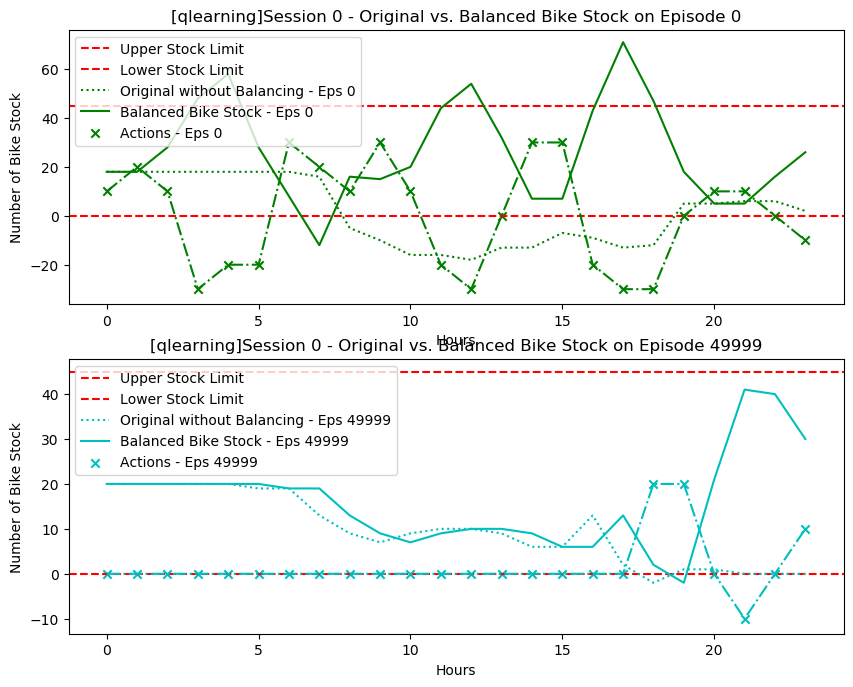

In [366]:
session = session_num
first_eps_idx = 0
last_eps_idx = 49999
method = 'qlearning'
plot2eps(session,first_eps_idx,last_eps_idx,method,df_session_sim_stock,df_session_stock_history,df_session_action_history)

In [235]:
df_session_rewards

,0
0,-205.0
1,-315.0
2,-307.5
3,-365.0
4,-147.5
5,-190.0
6,-330.0
7,-307.5
8,-472.5
9,-375.0


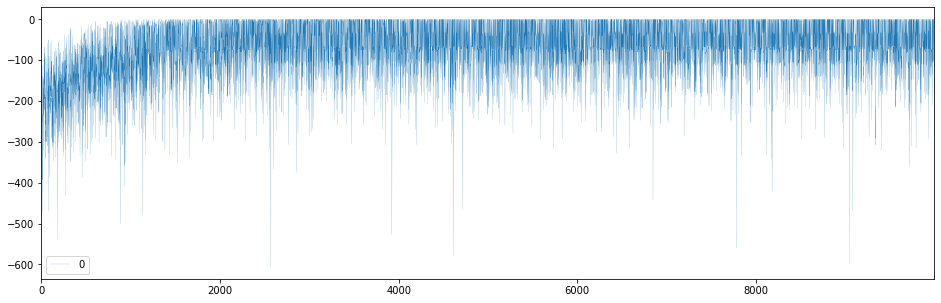

In [249]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df_session_rewards.plot(kind='line',y='0', linewidth=0.15,figsize=(16,5))


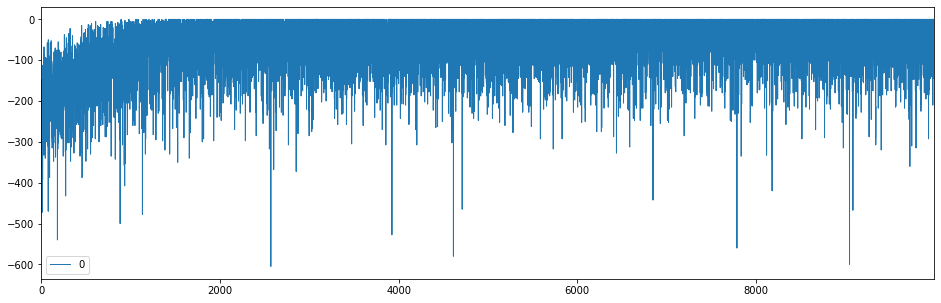

In [248]:
df_session_rewards.plot(kind='line',y='0', linewidth=1,figsize=(16,5))


In [296]:
df_session_action_history.iloc[5000:5500]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
5000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,-10
5001,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,-20
5002,0,0,0,0,0,0,0,0,0,0,...,0,10,10,0,0,0,0,0,0,0
5003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-20,0,0,0
5004,0,0,0,0,0,0,0,0,0,0,...,0,10,0,-20,-20,-5,0,0,0,-10
5005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-20
5006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,10,0,0,0,20
5007,0,0,-20,-20,0,10,-5,20,5,5,...,0,0,0,0,0,0,0,0,0,10
5008,0,0,0,0,0,0,0,0,0,0,...,0,5,10,0,0,0,0,-10,0,20
5009,0,0,0,0,0,0,0,0,0,0,...,20,20,5,10,0,-5,-10,0,0,-20


In [303]:
from statistics import mean
mean(list(df_session_action_history.iloc[95000:99000].astype(bool).sum(axis=1)))

2.38375